# Overview
This project analyzes real estate in King County, using data-driven solutions from a dataset of 30,155 homes to provide concrete business suggestions for a real estate development company in KC.

# Business Problem
Real estate developers in King County, Washington, might be able to gain better insight in regards to factors that might impact the price of a home, be those more obvious factors such as home location and size, or more subtle ones such as bathroom count or patio size, and use these insights to improve their sales and profit margins.

# Data Understanding
The King County dataset is comprised of a list of over 30,000 homes in King County purchased between 2021 and 2022, and includes information on each home such as year built (some homes as early as 1900, some as recent as 2022), location, price paid, and various other specifications (number of floors, bedrooms, and bathrooms, square footage, year last renovated, etc.).

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import sklearn as sk
# Load data into a pandas dataframe
data = pd.read_csv('kc_house_data.csv')

In [7]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


# Data Cleaning / Engineering

First step of cleaning up a dataset is discovering what null values are present and potentially dropping those values.

I created another column, sqft_total, which combines sqft_living with sqft_lot, and arranged it so that it is next to the other sqft columns.

I also added a column for "YearsOld," which transforms "yr_built" into years old.

In [8]:
data.dropna()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [10]:
data['sqft_total'] = data['sqft_living'] + data['sqft_lot'] + data['sqft_above'] + data['sqft_basement'] + data['sqft_garage'] + data['sqft_patio']
cols = list(data.columns.values)
cols
data = data[[
    'id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
    'sqft_total',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'greenbelt',
 'nuisance',
 'view',
 'condition',
 'grade',
 'heat_source',
 'sewer_system',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio',
 'yr_built',
 'yr_renovated',
 'address',
 'lat',
 'long',]]

data = data.sort_values('price', ascending=False)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_total,sqft_living,sqft_lot,floors,waterfront,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
23470,5026900270,11/4/2021,30750000.0,1,3.5,56045,2040,50705,2.0,YES,...,PUBLIC,2000,410,0,890,1989,0,"1620 Lake Washington Boulevard, Seattle, Washi...",47.615910,-122.280880
3760,3534900325,9/23/2021,23500000.0,4,5.0,27374,4440,15494,2.0,YES,...,PUBLIC,4440,0,900,2100,1990,2014,"4335 Hunts Point Road, Hunts Point, Washington...",47.650735,-122.230482
25561,624059038,9/23/2021,22750000.0,5,7.0,50660,8160,32920,2.0,YES,...,PUBLIC,8070,90,1020,400,2003,0,"2011 100th Avenue Northeast, Bellevue, Washing...",47.628725,-122.207360
27175,5427300046,9/27/2021,20000000.0,4,6.5,46220,7610,28800,1.0,YES,...,PUBLIC,4600,3010,660,1540,1966,2006,"605 Evergreen Point Road, Medina, Washington 9...",47.616095,-122.239600
18100,3304700355,12/12/2021,17800000.0,5,7.0,129215,12470,92345,2.0,NO,...,PRIVATE,12470,8020,3390,520,1997,0,"69 Olympic Drive, Shoreline, Washington 98177,...",47.741150,-122.374255


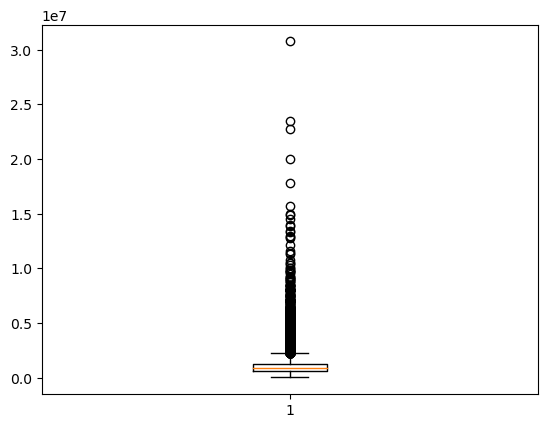

In [11]:
import matplotlib.pyplot as plt

plt.boxplot(data['price'])
plt.show()

In [12]:
data["yr_built"].max()

2022

In [44]:
current_year = pd.Timestamp.now().year
data['years_old'] = current_year - data['yr_built']

data.head()

,id,date,price,bedrooms,bathrooms,sqft_total,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,years_old
23470,5026900270,11/4/2021,30750000.0,1,3.5,56045,2040,50705,2.0,YES,...,2000,410,0,890,1989,0,"1620 Lake Washington Boulevard, Seattle, Washi...",47.615910,-122.280880,34
3760,3534900325,9/23/2021,23500000.0,4,5.0,27374,4440,15494,2.0,YES,...,4440,0,900,2100,1990,2014,"4335 Hunts Point Road, Hunts Point, Washington...",47.650735,-122.230482,33
25561,624059038,9/23/2021,22750000.0,5,7.0,50660,8160,32920,2.0,YES,...,8070,90,1020,400,2003,0,"2011 100th Avenue Northeast, Bellevue, Washing...",47.628725,-122.207360,20
27175,5427300046,9/27/2021,20000000.0,4,6.5,46220,7610,28800,1.0,YES,...,4600,3010,660,1540,1966,2006,"605 Evergreen Point Road, Medina, Washington 9...",47.616095,-122.239600,57
18100,3304700355,12/12/2021,17800000.0,5,7.0,129215,12470,92345,2.0,NO,...,12470,8020,3390,520,1997,0,"69 Olympic Drive, Shoreline, Washington 98177,...",47.741150,-122.374255,26


In [45]:
data.corr()["price"]

/tmp/ipykernel_1335/317552550.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()["price"]


id              -0.034184
price            1.000000
bedrooms         0.289204
bathrooms        0.480401
sqft_total       0.107659
sqft_living      0.608521
sqft_lot         0.085730
floors           0.180576
sqft_above       0.538651
sqft_basement    0.245058
sqft_garage      0.264169
sqft_patio       0.313409
yr_built         0.096013
yr_renovated     0.084786
lat              0.063632
long            -0.022509
years_old       -0.096013
Name: price, dtype: float64

In [46]:
data.corr()

/tmp/ipykernel_1335/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,id,price,bedrooms,bathrooms,sqft_total,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,years_old
id,1.000000,-0.034184,-0.006306,-0.012094,-0.119571,-0.027932,-0.119101,0.032043,-0.023216,-0.014662,-0.007829,-0.041625,0.023071,-0.029131,-0.000691,0.000479,-0.023071
price,-0.034184,1.000000,0.289204,0.480401,0.107659,0.608521,0.085730,0.180576,0.538651,0.245058,0.264169,0.313409,0.096013,0.084786,0.063632,-0.022509,-0.096013
bedrooms,-0.006306,0.289204,1.000000,0.589273,0.025957,0.637874,0.003306,0.147592,0.547164,0.238502,0.319441,0.183439,0.146191,0.014286,0.108758,-0.106689,-0.146191
bathrooms,-0.012094,0.480401,0.589273,1.000000,0.063810,0.772677,0.035886,0.404412,0.674924,0.260902,0.457022,0.327551,0.443648,0.040631,-0.005225,0.017400,-0.443648
sqft_total,-0.119571,0.107659,0.025957,0.063810,1.000000,0.154970,0.999332,-0.021793,0.160423,0.019072,0.108837,0.172327,0.012492,0.011040,0.033753,-0.037505,-0.012492
sqft_living,-0.027932,0.608521,0.637874,0.772677,0.154970,1.000000,0.119563,0.304240,0.883984,0.338460,0.511740,0.396030,0.291694,0.038499,0.102186,-0.087669,-0.291694
sqft_lot,-0.119101,0.085730,0.003306,0.035886,0.999332,0.119563,1.000000,-0.032097,0.129231,0.004111,0.087169,0.155250,0.001750,0.010049,0.030020,-0.034308,-0.001750
floors,0.032043,0.180576,0.147592,0.404412,-0.021793,0.304240,-0.032097,1.000000,0.448281,-0.248093,0.132656,0.125183,0.544646,-0.025449,-0.218554,0.233781,-0.544646
sqft_above,-0.023216,0.538651,0.547164,0.674924,0.160423,0.883984,0.129231,0.448281,1.000000,-0.066801,0.560551,0.312117,0.387448,0.010598,0.092258,-0.082744,-0.387448
sqft_basement,-0.014662,0.245058,0.238502,0.260902,0.019072,0.338460,0.004111,-0.248093,-0.066801,1.000000,0.026361,0.210500,-0.230226,0.053634,0.059788,-0.045208,0.230226


Checking for Multicollinearity above, it appears that independent variables with high correlation (>0.7) values include: 

+ sqft_living and sqft_above

+ sqft_living and bathrooms

Since were mainly concerned with a variables correlation with price, I don't want to remove sqft_living, since on its own it has the highest correlation with price(~0.61), so I will remove sqft_above and bathrooms from the regression model.

Before diving into building a multiple linear regression model, I first decided the best thing was to build a simple linear regression as the baseline model, using the variable with the highest correlation against price, sqft_living.

In [47]:
y = data["price"]
X_baseline = data[["sqft_living"]]

In [48]:
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.773e+04
Date:                Mon, 26 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:22:16   Log-Likelihood:            -4.4912e+05
No. Observations:               30155   AIC:                         8.982e+05
Df Residuals:                   30153   BIC:                         8.983e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.443e+04   9782.728     -7.609      

In [49]:
baseline_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.773e+04
Date:                Mon, 26 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:22:16   Log-Likelihood:            -4.4912e+05
No. Observations:               30155   AIC:                         8.982e+05
Df Residuals:                   30153   BIC:                         8.983e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.443e+04   9782.728     -7.609      0.000   -9.36e+04   -5.53e+04
sqft_living   560.0050      4.206    133.160      0.000     551.762     568.248
==============================================================================
Omnibus:                    43429.367   Durbin-Watson:                   0.630
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47159181.471
Skew:                           8.188   Prob(JB):                         0.00
Kurtosis:                     196.042   Cond. No.                     5.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Simple Linear Regression Results
Looking at the summary above, we can see that the regression line we found was

price=-7.443e+04 + 560.0050sqft_living
 
+ The model is statistically significant overall, with an F-statistic p-value well below 0.05

+ The model explains about 37% of the variance in MPG

+ The model coefficients (const and sqft_living) are both statistically significant, with t-statistic p-values well below 0.05

+ If a house had 0 square feet of living space, we would expect price to be about -7.443e+04

+ For each increase of 1 foot in axrea, we see an associated increase in price of about 560.0050

# Simple Linear Regression Visualization

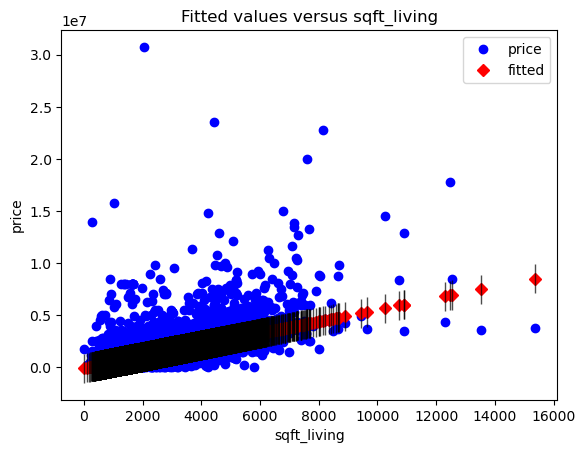

In [50]:
sm.graphics.plot_fit(baseline_results, "sqft_living")
plt.show()

Visualizing our regression line:

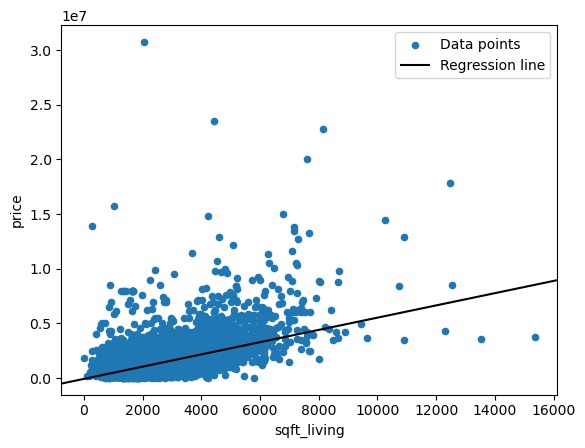

In [51]:
fig, ax = plt.subplots()
data.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_results, label="Regression line", ax=ax, color="black")
ax.legend();

Plotting the residuals:

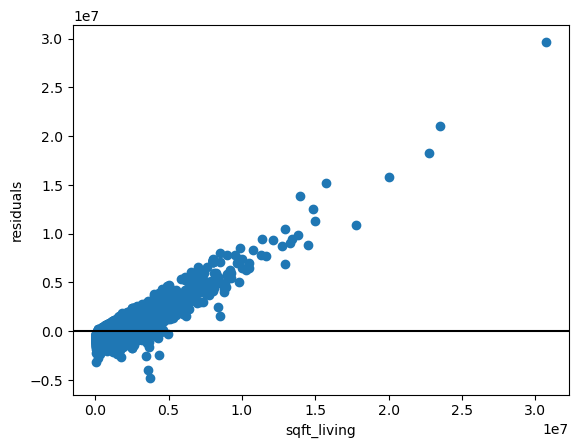

In [52]:
fig, ax = plt.subplots()

ax.scatter(data["price"], baseline_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals");

In [53]:
from statsmodels.stats.diagnostic import linear_rainbow
linear_rainbow(baseline_results)

(32.31454510548477, 0.0)

IndexError: index 13 is out of bounds for axis 0 with size 13

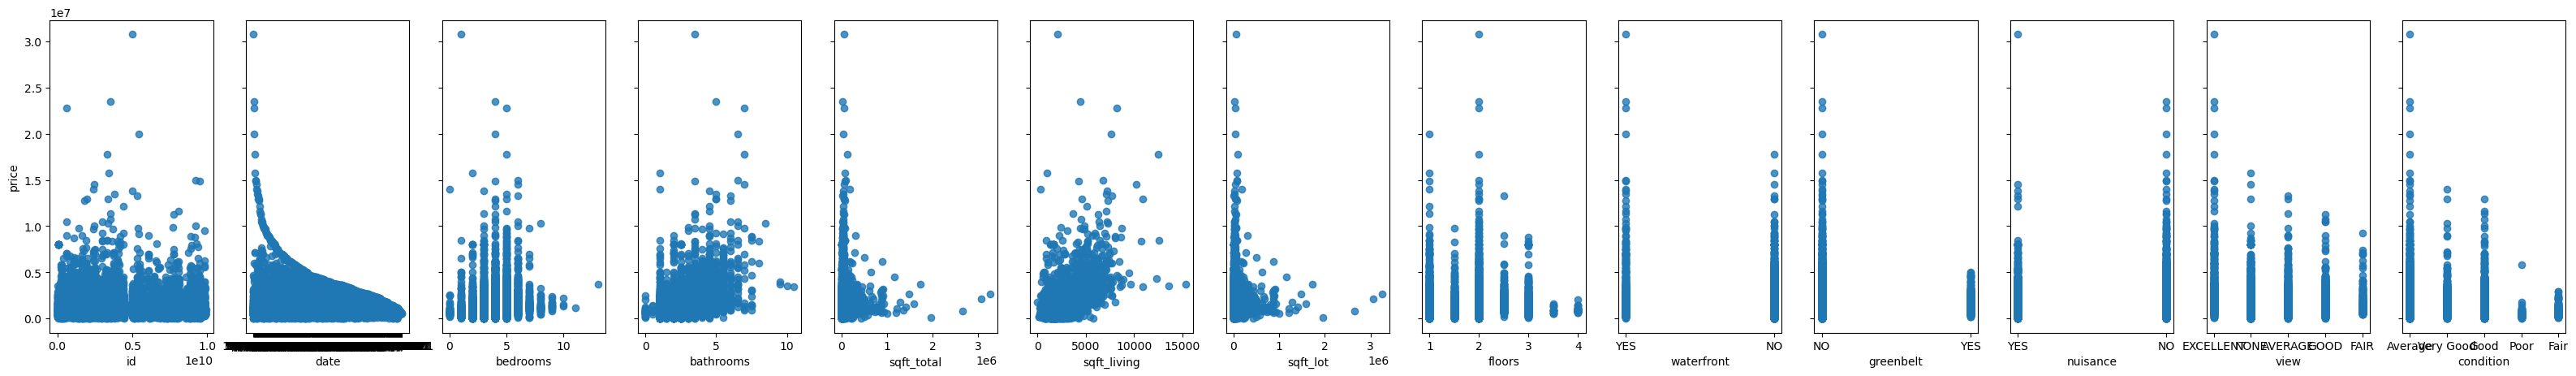

In [54]:
fig, axes = plt.subplots(ncols=13, figsize=(40,5), sharey=True)
axes[0].set_ylabel("price")

for i, col in enumerate(data.drop("price", axis=1).columns):
    ax = axes[i]
    ax.scatter(data[col], data["price"], alpha=0.8)
    ax.set_xlabel(col)

We knew that sqft_living had the highest correlation with price, given the correlation metric, and it appears through data visualization that sqft_living does have the most linear relationship with price out of all the features.

Bathrooms seem to be another variable that have an apparent linear relationship with price; however, bathrooms appear to be a categorical variable, and there are numerous other categorical variables that impact our dataset, including floors, waterfront, greenbelt, nuisance, and view.

Some categorical variables can be addressed using one-hot encoding:

# More Data Visualizations

In [55]:
data['bedrooms'].mean()

3.4135300945116898

In [56]:
avg_prices = data.groupby('bedrooms')['price'].mean()
#For sample size purposes, only including bedroom counts that have over one hundred houses in our dataframe
avg_prices[1:7]

/tmp/ipykernel_1335/90965417.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  avg_prices[1:7]


bedrooms
1    9.077393e+05
2    7.802782e+05
3    9.341740e+05
4    1.269676e+06
5    1.674203e+06
6    1.848920e+06
Name: price, dtype: float64

In [57]:
data[data['bedrooms'] == 6].count()

id               498
date             498
price            498
bedrooms         498
bathrooms        498
sqft_total       498
sqft_living      498
sqft_lot         498
floors           498
waterfront       498
greenbelt        498
nuisance         498
view             498
condition        498
grade            498
heat_source      498
sewer_system     498
sqft_above       498
sqft_basement    498
sqft_garage      498
sqft_patio       498
yr_built         498
yr_renovated     498
address          498
lat              498
long             498
years_old        498
dtype: int64

/tmp/ipykernel_1335/2704712807.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  avg_prices[1:7].plot(kind='bar')


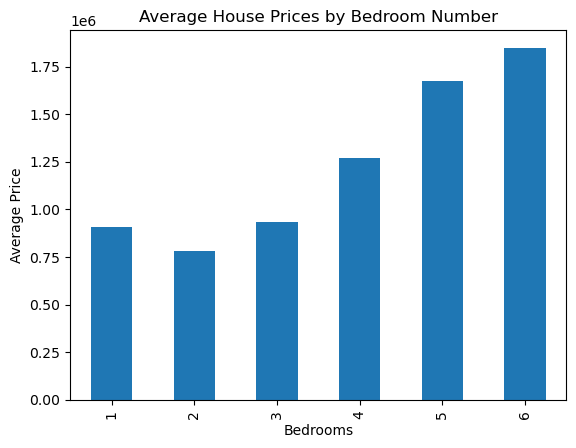

In [58]:
avg_prices[1:7].plot(kind='bar')
plt.xlabel('Bedrooms')
plt.ylabel('Average Price')
plt.title('Average House Prices by Bedroom Number')
plt.show()

In [59]:
avg_prices_yrbuilt = data.groupby('yr_built')['price'].mean()
avg_prices_yrbuilt

yr_built
1900    1.055792e+06
1901    1.258504e+06
1902    1.381919e+06
1903    1.241454e+06
1904    1.168721e+06
            ...     
2018    1.394346e+06
2019    1.535509e+06
2020    1.227338e+06
2021    1.152290e+06
2022    1.278716e+06
Name: price, Length: 123, dtype: float64

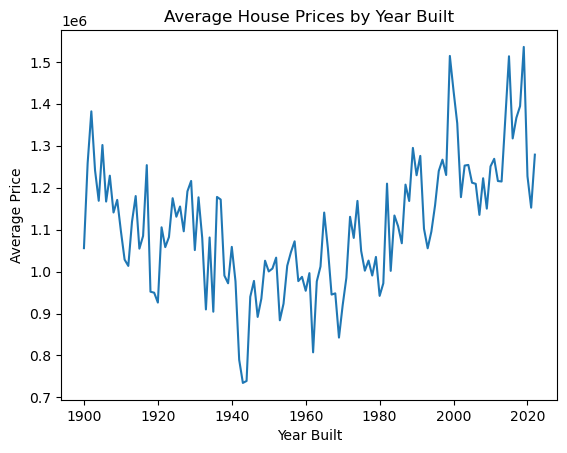

In [60]:
avg_prices_yrbuilt.plot(kind='line')
plt.xlabel('Year Built')
plt.ylabel('Average Price')
plt.title('Average House Prices by Year Built')
plt.show()

In [61]:
avg_prices_yrrenovated = data.groupby('yr_renovated')['price'].mean()
avg_prices_yrrenovated

yr_renovated
0       1.091996e+06
1924    4.800000e+05
1928    7.824500e+05
1930    6.020000e+05
1940    8.283333e+05
            ...     
2018    1.247892e+06
2019    1.400717e+06
2020    1.188668e+06
2021    9.910981e+05
2022    7.044346e+05
Name: price, Length: 83, dtype: float64

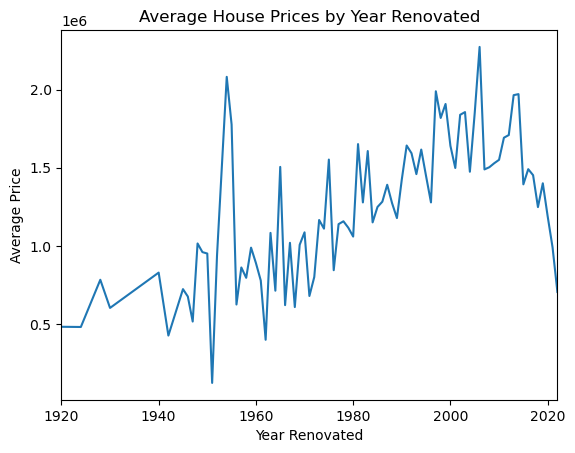

In [62]:
avg_prices_yrrenovated.plot(kind='line')
plt.xlim(1920, 2022)
plt.xlabel('Year Renovated')
plt.ylabel('Average Price')
plt.title('Average House Prices by Year Renovated')
plt.show()

In [63]:
avg_prices_sqftliving = data.groupby('sqft_living')['price'].mean()
avg_prices_sqftliving

sqft_living
3         1803000.0
100        205000.0
170        205000.0
210        525000.0
260       1160000.0
            ...    
12300     4350000.0
12470    17800000.0
12540     8500000.0
13540     3580000.0
15360     3750000.0
Name: price, Length: 1318, dtype: float64

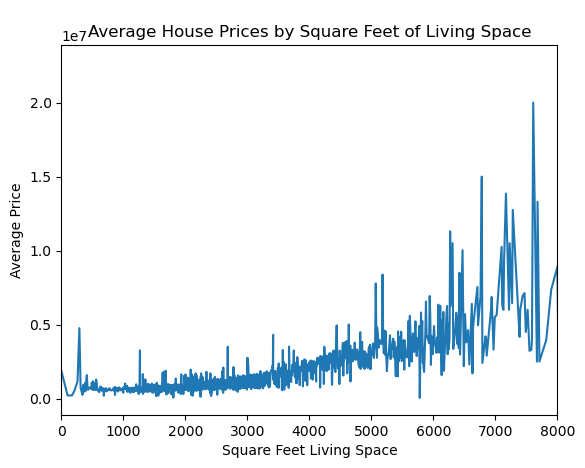

In [64]:
avg_prices_sqftliving.plot(kind='line')
plt.xlim(0, 8000)
plt.xlabel('Square Feet Living Space')
plt.ylabel('Average Price')
plt.title('Average House Prices by Square Feet of Living Space')
plt.show()

In [65]:
avg_prices_waterfront = data.groupby('waterfront')['price'].mean()
avg_prices_waterfront

waterfront
NO     1.080986e+06
YES    2.681686e+06
Name: price, dtype: float64

In [66]:
2.681686e+06 - 1.080986e+06

1600700.0

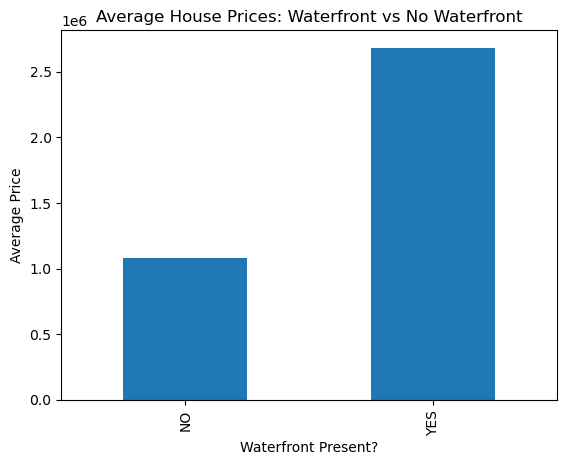

In [67]:
avg_prices_waterfront.plot(kind='bar')
plt.xlabel('Waterfront Present?')
plt.ylabel('Average Price')
plt.title('Average House Prices: Waterfront vs No Waterfront')
plt.show()

In [68]:
avg_prices_view = data.groupby('view')['price'].mean()
avg_prices_view

view
AVERAGE      1.451993e+06
EXCELLENT    2.994147e+06
FAIR         1.742069e+06
GOOD         1.736416e+06
NONE         1.018607e+06
Name: price, dtype: float64

In [69]:
data[data['view'] == 'NONE'].value_counts()
2.994147e+06- 1.018607e+06

1975540.0

In [70]:
1.451993e+06 - 1.018607e+06

433386.0

In [71]:
433386.0/1.018607e+06

0.4254692928676123

Basic initial analysis seems to indicate the clear impact a view (or more specifically, the lack thereof) has on the sale price of a home.

+ The jump from no view to an average view alone comes with an average price difference of +$433,386, a massive %42.5 increase!

+ Homes with an “excellent” view are sold at an average of %200 more than homes with no view (nearly $2 million more!

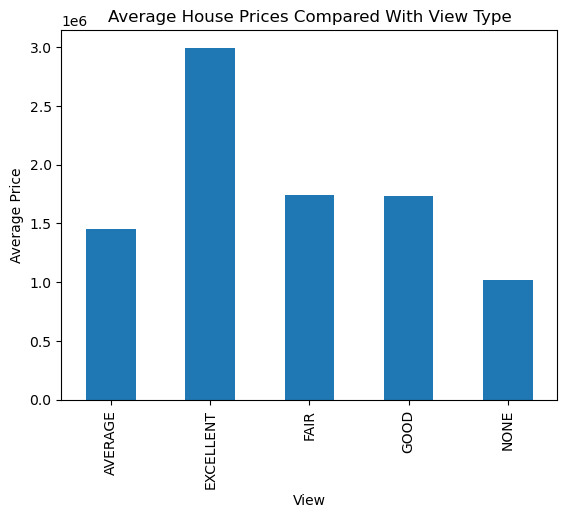

In [72]:
avg_prices_view.plot(kind='bar')
plt.xlabel('View')
plt.ylabel('Average Price')
plt.title('Average House Prices Compared With View Type')
plt.show()

# Multiple Linear Regression 

Building a new model with many of the features from our dataset:


In [73]:
X = data[['bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'years_old', 'waterfront', 'sqft_patio', 'sqft_total']]
y = data['price']

Since waterfront is a categorical variable, with choices yes or no, it was best to one-hot encode that column using the pandas one-hot encoding technique.

In [74]:
X = pd.get_dummies(X, columns=["waterfront"], drop_first=True)
X

,bedrooms,sqft_living,sqft_lot,floors,years_old,sqft_patio,sqft_total,waterfront_YES
23470,1,2040,50705,2.0,34,890,56045,1
3760,4,4440,15494,2.0,33,2100,27374,1
25561,5,8160,32920,2.0,20,400,50660,1
27175,4,7610,28800,1.0,57,1540,46220,1
18100,5,12470,92345,2.0,26,520,129215,0
...,...,...,...,...,...,...,...,...
27028,2,770,8400,1.0,99,60,10760,0
20406,3,1880,3755,2.0,22,190,8135,0
7577,2,1660,56809,1.0,72,0,60129,0
21793,3,2320,2690,2.0,15,490,7820,0


In [75]:
subset_model = sm.OLS(y, sm.add_constant(X))
subset_results = subset_model.fit()

print(subset_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     2827.
Date:                Mon, 26 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:22:50   Log-Likelihood:            -4.4766e+05
No. Observations:               30155   AIC:                         8.953e+05
Df Residuals:                   30146   BIC:                         8.954e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.342e+05   2.29e+04     -5.

In [76]:
subset_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     2827.
Date:                Mon, 26 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:22:51   Log-Likelihood:            -4.4766e+05
No. Observations:               30155   AIC:                         8.953e+05
Df Residuals:                   30146   BIC:                         8.954e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.342e+05   2.29e+04     -5.862      0.000   -1.79e+05   -8.93e+04
bedrooms       -1.297e+05   5245.715    -24.721      0.000    -1.4e+05   -1.19e+05
sqft_living      442.2601     22.288     19.843      0.000     398.574     485.946
sqft_lot         -86.4541      9.948     -8.691      0.000    -105.952     -66.956
floors          8.484e+04   8487.855      9.996      0.000    6.82e+04    1.01e+05
years_old       3161.1364    148.150     21.337      0.000    2870.755    3451.517
sqft_patio       125.2965     20.591      6.085      0.000      84.937     165.656
sqft_total        86.2039      9.947      8.666      0.000      66.707     105.701
waterfront_YES  1.136e+06   3.06e+04     37.134      0.000    1.08e+06     1.2e+06
==============================================================================
Omnibus:                    41409.882   Durbin-Watson:                   0.751
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         41278974.761
Skew:                           7.442   Prob(JB):                         0.00
Kurtosis:                     183.643   Cond. No.                     7.05e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

+ Our new model is statistically significant overall, and explains 42.9% of the
variance in price. This is a small increase in variance explained than the simple
model.

+ Using an alpha of 0.05, our intercept and coefficients for all of our variables are statistically significant.

 + So, we have an improvement in terms of variance explained (R-Squared).


+ Somthing to notice from this model is that a waterfront home is correlated 
with an increase of $1,136,000 in value versus a home that is not waterfront!

+ Below, I calculated the mean of waterfront homes, and compared it with the mean of the average home price
in the dataset, and discovered that the price of a waterfront home is about 1.755 standard deviations higher
than the average home price.


Finding the mean of waterfront home price:

In [77]:
waterfront_mean = data[data['waterfront'] == 'YES']['price'].mean()
print(waterfront_mean)

2681685.6801541424


Finding the mean of non-waterfront homes' price:

In [78]:
non_waterfront_mean = data[data['waterfront'] == 'NO']['price'].mean()
print(non_waterfront_mean)

1080986.0751450937


In [79]:
data['price'].mean()

1108535.837871

In [80]:
data['price'].std()

896385.6591926551

In [81]:
waterfront_mean = 2681685.6801541424
num_std_away_from_avg = (2681685.6801541424 - 1108535.837871) / 896385.6591926551
print(num_std_away_from_avg)

1.7549922024634201


In [82]:
subset_results.resid.abs()

23470    2.813898e+07
3760     1.949556e+07
25561    1.698333e+07
27175    1.419849e+07
18100    9.595331e+06
             ...     
27028    5.247938e+05
20406    9.193389e+05
7577     8.967272e+05
21793    1.195310e+06
8557     3.289623e+05
Length: 30155, dtype: float64

In [83]:
mae = subset_results.resid.abs().sum() / len(y)
mae

381804.85907302704

In [84]:
381768.507695581/data['price'].mean()

0.344389865129473

+ It appears the MAE informs us that on average, our model has an error of 
$381,768 USD when predicting the price of a home in King County,
which is 34.4% of the mean of our target variable, which is average home price.

+ This is not ideal. Will try to improve the model by adding more predictor variables,
considering nonlinear variables in the model that need to be transformed, or another method

In [85]:
subset_results.resid ** 2

23470    7.918021e+14
3760     3.800767e+14
25561    2.884335e+14
27175    2.015972e+14
18100    9.207037e+13
             ...     
27028    2.754086e+11
20406    8.451839e+11
7577     8.041197e+11
21793    1.428765e+12
8557     1.082162e+11
Length: 30155, dtype: float64

In [86]:
rmse = ((subset_results.resid ** 2).sum() / len(y)) ** 0.5
rmse

677561.8926437015

+ The RMSE of 675044.6 is larger than our MAE of 381768.5. When MAE < RMSE, it can be indicative that there are outliers present in our data.This corresponds to the visualization of our baseline model, comparing sqft_living and price, where there appeared to be outliers.

## Testing the assumptions of linear regression - visualizing residual distribution
+ Testing for normality among the residuals
+ Filter the residuals based on the threshold

In [114]:
residuals = subset_results.resid

/tmp/ipykernel_1335/511992707.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(residuals,kde=True)


NameError: name 'threshold' is not defined

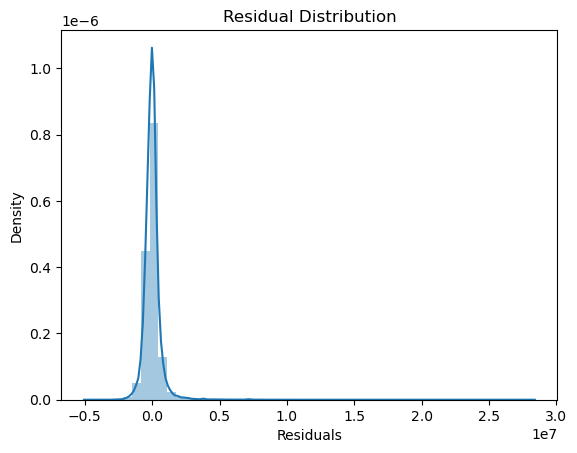

In [115]:
p = sns.distplot(residuals,kde=True)

plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Residual Distribution')


filtered_residuals = residuals[residuals < threshold]

((array([-4.07521547, -3.86390471, -3.74847657, ...,  3.74847657,
          3.86390471,  4.07521547]),
  array([-4806395.33734091, -4268540.59106762, -3255138.27959472, ...,
         16983328.92749231, 19495555.29232945, 28138979.18899994])),
 (561044.5610862224, -7.022848939944352e-07, 0.8279255609975552))

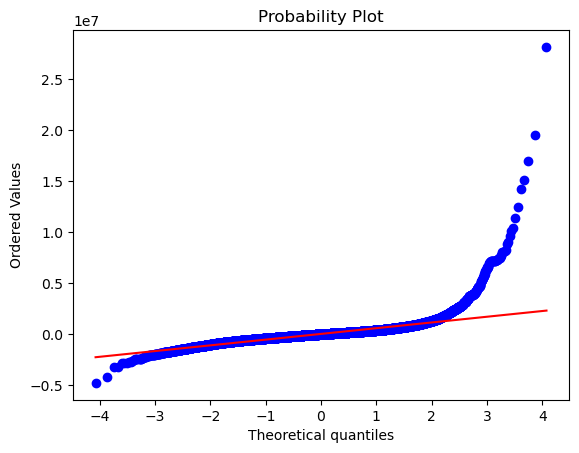

In [116]:
import numpy as np 
import pylab 
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)

## More Data Transformation
+ transforming our 'condition' and 'view' parameters using OneHotEncoder through the sklearn package

In [117]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoder.fit(data[['condition']])
encoded = encoder.transform(data[['condition']])

encoded_data_condition = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names(['condition']))

encoded_data_condition


/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
30150,1.0,0.0,0.0,0.0,0.0
30151,1.0,0.0,0.0,0.0,0.0
30152,1.0,0.0,0.0,0.0,0.0
30153,1.0,0.0,0.0,0.0,0.0


In [118]:
encoder = OneHotEncoder()
encoder.fit(data[['view']])
encoded = encoder.transform(data[['view']])

encoded_data_view = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names(['view']))

encoded_data_view

/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE
0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
30150,0.0,0.0,0.0,0.0,1.0
30151,0.0,0.0,0.0,0.0,1.0
30152,0.0,0.0,0.0,0.0,1.0
30153,0.0,0.0,0.0,0.0,1.0


Concatenating the original dataframe with the encoded dataframe:

In [119]:
data_encoded = pd.concat([data, encoded_data_condition, encoded_data_view], axis=1)
data_encoded.head()

,id,date,price,bedrooms,bathrooms,sqft_total,sqft_living,sqft_lot,floors,waterfront,...,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE
23470,5026900270,11/4/2021,30750000.0,1,3.5,56045,2040,50705,2.0,YES,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3760,3534900325,9/23/2021,23500000.0,4,5.0,27374,4440,15494,2.0,YES,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
25561,624059038,9/23/2021,22750000.0,5,7.0,50660,8160,32920,2.0,YES,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27175,5427300046,9/27/2021,20000000.0,4,6.5,46220,7610,28800,1.0,YES,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18100,3304700355,12/12/2021,17800000.0,5,7.0,129215,12470,92345,2.0,NO,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [120]:
selected_columns = data_encoded[["id", "price", "waterfront"]]
selected_columns.head()
selected_columns['price'].mean()

1108535.837871

In [121]:
data_encoded.head()

,id,date,price,bedrooms,bathrooms,sqft_total,sqft_living,sqft_lot,floors,waterfront,...,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE
23470,5026900270,11/4/2021,30750000.0,1,3.5,56045,2040,50705,2.0,YES,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3760,3534900325,9/23/2021,23500000.0,4,5.0,27374,4440,15494,2.0,YES,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
25561,624059038,9/23/2021,22750000.0,5,7.0,50660,8160,32920,2.0,YES,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27175,5427300046,9/27/2021,20000000.0,4,6.5,46220,7610,28800,1.0,YES,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18100,3304700355,12/12/2021,17800000.0,5,7.0,129215,12470,92345,2.0,NO,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [122]:
data_encoded_2 = pd.get_dummies(data_encoded['waterfront'])

data_encoded_aggregated = pd.concat([data_encoded, data_encoded_2], axis=1)
total_subset_data = data_encoded_aggregated
data_encoded_2['NO'] = 'Waterfront_NO'
data_encoded_2['YES'] = 'Waterfront_YES'
total_subset_data

,id,date,price,bedrooms,bathrooms,sqft_total,sqft_living,sqft_lot,floors,waterfront,...,condition_Good,condition_Poor,condition_Very Good,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,NO,YES
23470,5026900270,11/4/2021,30750000.0,1,3.5,56045,2040,50705,2.0,YES,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1
3760,3534900325,9/23/2021,23500000.0,4,5.0,27374,4440,15494,2.0,YES,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0,1
25561,624059038,9/23/2021,22750000.0,5,7.0,50660,8160,32920,2.0,YES,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1
27175,5427300046,9/27/2021,20000000.0,4,6.5,46220,7610,28800,1.0,YES,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1
18100,3304700355,12/12/2021,17800000.0,5,7.0,129215,12470,92345,2.0,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27028,7359600115,11/27/2021,28854.0,2,1.0,10760,770,8400,1.0,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0
20406,9475710010,1/6/2022,28559.0,3,2.5,8135,1880,3755,2.0,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0
7577,1626059005,11/4/2021,28307.0,2,1.0,60129,1660,56809,1.0,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0
21793,7228502286,1/26/2022,27563.0,3,2.5,7820,2320,2690,2.0,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0


Returning back to the original data visualization, to investigate if there are other transformations to conduct with the predictors.

IndexError: index 13 is out of bounds for axis 0 with size 13

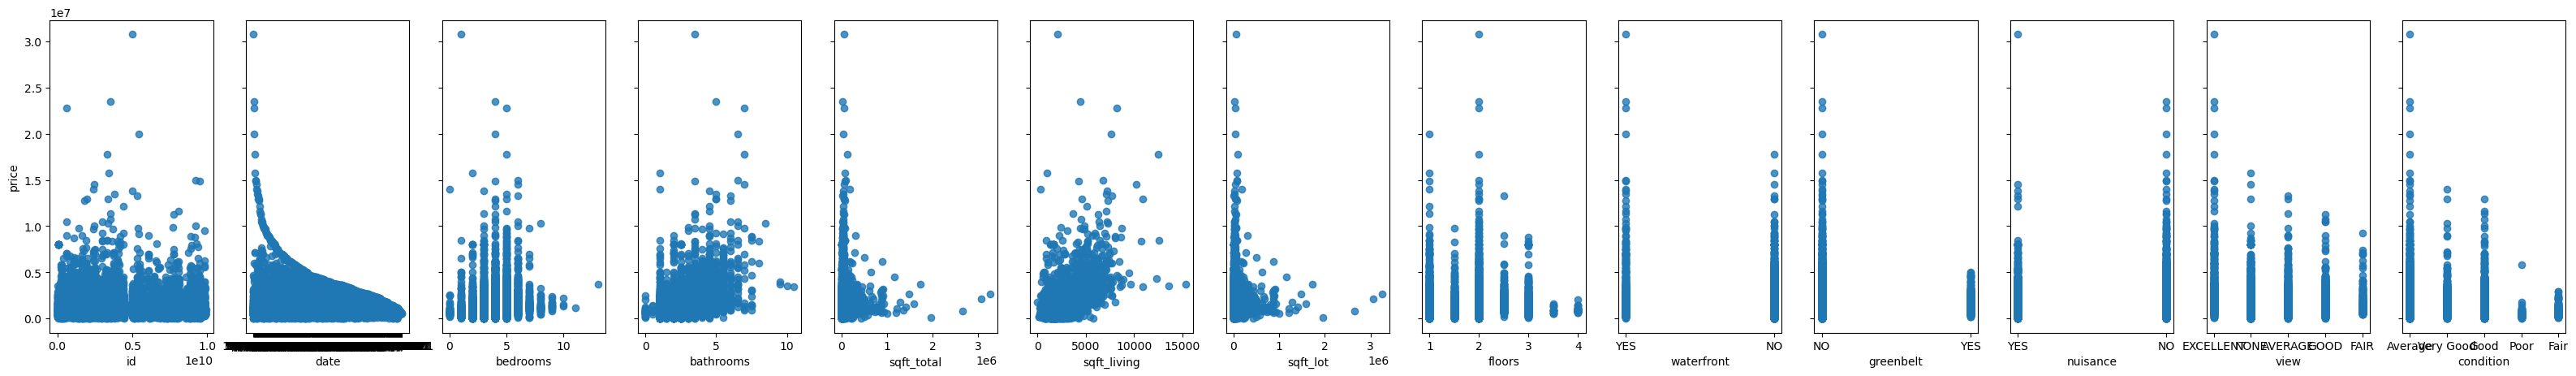

In [123]:
fig, axes = plt.subplots(ncols=13, figsize=(40,5), sharey=True)
axes[0].set_ylabel("price")

for i, col in enumerate(data.drop("price", axis=1).columns):
    ax = axes[i]
    ax.scatter(data[col], data["price"], alpha=0.8)
    ax.set_xlabel(col)

+ Transorming sqft_lot and sqft_total using rational transformation, since both of those
variables appear to be rational, not linear

In [126]:
total_subset_data['sqft_lot_transformed'] = 1 / total_subset_data['sqft_lot']
total_subset_data['sqft_total_transformed'] = 1 / total_subset_data['sqft_total']


+ Transforming the bedrooms variable, which appears to be normally distributed, into a more linear
relationship using feature engineering

In [127]:
total_subset_data['bedrooms_transformed'] = np.sqrt(total_subset_data['bedrooms'])

In [128]:

X_2 = total_subset_data[['bedrooms', 'bedrooms_transformed', 'sqft_living','sqft_total', 'sqft_lot', 'sqft_total_transformed', 'sqft_lot_transformed', 'floors', 'condition_Average', 'condition_Fair', 'condition_Good', 'condition_Poor', 'condition_Very Good', 'view_AVERAGE', 'view_EXCELLENT', 'view_FAIR', 'view_GOOD', 'view_NONE', 'NO', 'YES']]
y_2 = total_subset_data['price']
new_subset_model = sm.OLS(y_2, sm.add_constant(X_2))
new_subset_results = new_subset_model.fit()

# Printing the summary of the model
new_subset_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     1310.
Date:                Mon, 26 Jun 2023   Prob (F-statistic):               0.00
Time:                        18:12:30   Log-Likelihood:            -4.4776e+05
No. Observations:               30155   AIC:                         8.955e+05
Df Residuals:                   30137   BIC:                         8.957e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   6.197e+05   4.36e+04     14.227      0.000    5.34e+05    7.05e+05
bedrooms                5.546e+04   2.36e+04      2.346      0.019    9127.426    1.02e+05
bedrooms_transformed   -6.217e+05   8.36e+04     -7.434      0.000   -7.86e+05   -4.58e+05
sqft_living              390.4356     20.380     19.158      0.000     350.490     430.381
sqft_total               127.4041      8.745     14.569      0.000     110.264     144.544
sqft_lot                -127.3489      8.744    -14.564      0.000    -144.487    -110.210
sqft_total_transformed  1.871e+09   1.88e+08      9.968      0.000     1.5e+09    2.24e+09
sqft_lot_transformed   -1.224e+08   3.78e+07     -3.236      0.001   -1.96e+08   -4.82e+07
floors                 -6.323e+04   9338.511     -6.771      0.000   -8.15e+04   -4.49e+04
condition_Average       1.105e+05   1.97e+04      5.610      0.000    7.19e+04    1.49e+05
condition_Fair          1.604e+05   4.07e+04      3.939      0.000    8.06e+04     2.4e+05
condition_Good          1.189e+05   2.02e+04      5.893      0.000    7.94e+04    1.58e+05
condition_Poor          1.208e+05   7.03e+04      1.718      0.086    -1.7e+04    2.59e+05
condition_Very Good     1.091e+05   2.15e+04      5.072      0.000    6.69e+04    1.51e+05
view_AVERAGE            1.068e+05   1.87e+04      5.715      0.000    7.02e+04    1.43e+05
view_EXCELLENT          1.148e+05    2.7e+04      4.252      0.000    6.19e+04    1.68e+05
view_FAIR               1.863e+05   3.93e+04      4.745      0.000    1.09e+05    2.63e+05
view_GOOD               1.144e+05   2.31e+04      4.948      0.000    6.91e+04     1.6e+05
view_NONE               9.743e+04   1.43e+04      6.796      0.000    6.93e+04    1.26e+05
NO                      -3.06e+05   2.54e+04    -12.059      0.000   -3.56e+05   -2.56e+05
YES                     9.258e+05   2.78e+04     33.252      0.000    8.71e+05     9.8e+05
==============================================================================
Omnibus:                    40996.582   Durbin-Watson:                   0.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         39735858.474
Skew:                           7.300   Prob(JB):                         0.00
Kurtosis:                     180.235   Cond. No.                     2.99e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.71e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Visualizing Homoscedasticity/Heteroscedasticity of Errors
Linear regression assumes homoscedasticity of errors. To test the distribution of errors in multiple linear regression, a residuals plot is the best visualization. 

The target value will be along the x-axis while the residuals will be along the y-axis.


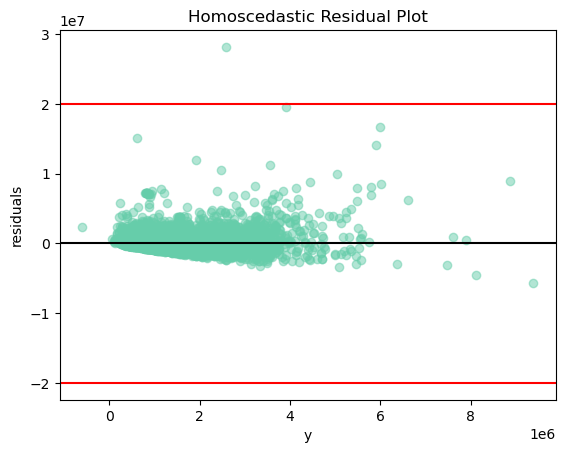

In [132]:
y_pred = new_subset_results.predict()
residuals = y_2 - y_pred
# Create scatter plot of data
fig, ax = plt.subplots()
ax.scatter(y_pred, residuals, color="mediumaquamarine", alpha=0.5)

# Plot horizontal lines
ax.axhline(y=0, color="black")
ax.axhline(y=2*10**7, color="red")  
ax.axhline(y=-2*10**7, color="red") 

# Customize labels
ax.set_xlabel("y")
ax.set_ylabel("residuals")
ax.set_title("Homoscedastic Residual Plot");

Implementing the Goldfeld-Quandt Test, which is a popular statistical test for homoscedastity

In [133]:
from statsmodels.stats.diagnostic import het_goldfeldquandt
het_goldfeldquandt(y_2, X_2, alternative='two-sided')

(0.031060517992428545, 0.0, 'two-sided')


-After adding a number of new variables to the model, our new model is statistically significant overall, 
and explains 42.5% of the variance in price, a similar number (slight decrease) to our previous R-squared

-Using an alpha of 0.05, our intercept and coefficients for all of our variables are statistically significant,
except for our one-hot-encoded dummy variable for condition_Poor which is 0.08.

-An interesting observation is that according to this model, each additional square foot in total of a property
is correlated with an increase of 127.40 in property value, while each additional square foot of living space
in particular is correlated with an increase of 390.44 of propoerty value. 

+ King County real estate developers should take this statistic into account to maximize the amount of living space in each home they built, which could have a greater positive impact on sale price as opposed to unused lot space.

-It appears from our coefficients that there is not a strong positive correlation between the conditions and views
of a particular home and the price

+ In fact, the conditions and views columns do not seem to be adding much to the model at all, 
and may just be adding 'noise' to the model so let's remove them. 


<AxesSubplot: >

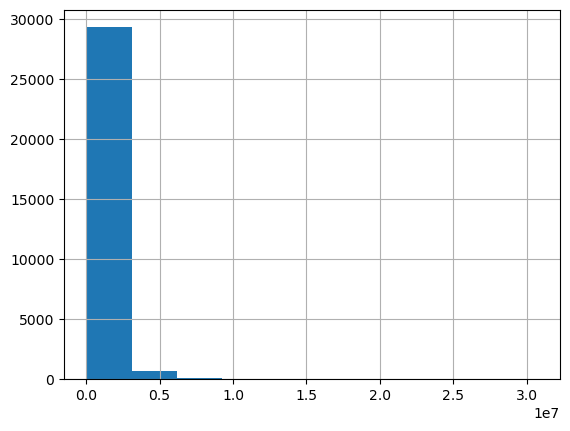

In [135]:
data['price'].hist()

<AxesSubplot: >

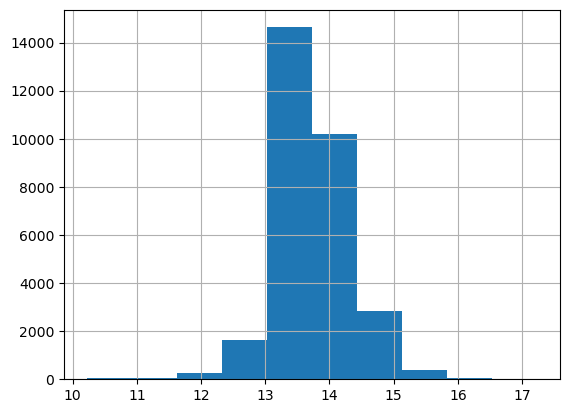

In [136]:
np.log(data['price']).hist()

+ It appears that price follows a logarithmic distribution, and taking the logarithm of our target variable price yields what appears to be a normal distribution of the logarithmically transformed price.

+ Testing what occurs if we create a model with a log transformed target (price)

In [137]:
y_log = np.log(y_2)
y_log.name = "log(price)"
y_log

23470    17.241401
3760     16.972511
25561    16.940076
27175    16.811243
18100    16.694709
           ...    
27028    10.270004
20406    10.259727
7577     10.250864
21793    10.224230
8557     10.216837
Name: log(price), Length: 30155, dtype: float64

# Model 3: Logarithmically Transformed Target Variable (Price)

In [138]:
log_model = sm.OLS(y_log, sm.add_constant(X_2))
log_results = log_model.fit()

log_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log(price)   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     1201.
Date:                Mon, 26 Jun 2023   Prob (F-statistic):               0.00
Time:                        18:15:46   Log-Likelihood:                -18711.
No. Observations:               30155   AIC:                         3.746e+04
Df Residuals:                   30137   BIC:                         3.761e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      6.9477      0.029    240.925      0.000       6.891       7.004
bedrooms                  -0.0139      0.016     -0.888      0.374      -0.045       0.017
bedrooms_transformed      -0.0749      0.055     -1.353      0.176      -0.183       0.034
sqft_living                0.0002   1.35e-05     15.424      0.000       0.000       0.000
sqft_total              8.207e-05   5.79e-06     14.176      0.000    7.07e-05    9.34e-05
sqft_lot               -8.204e-05   5.79e-06    -14.172      0.000   -9.34e-05   -7.07e-05
sqft_total_transformed   154.6137    124.273      1.244      0.213     -88.968     398.195
sqft_lot_transformed      52.3956     25.035      2.093      0.036       3.326     101.465
floors                     0.0339      0.006      5.476      0.000       0.022       0.046
condition_Average          1.3761      0.013    105.572      0.000       1.351       1.402
condition_Fair             1.4093      0.027     52.263      0.000       1.356       1.462
condition_Good             1.3752      0.013    102.916      0.000       1.349       1.401
condition_Poor             1.4173      0.047     30.442      0.000       1.326       1.509
condition_Very Good        1.3697      0.014     96.204      0.000       1.342       1.398
view_AVERAGE               1.3829      0.012    111.738      0.000       1.359       1.407
view_EXCELLENT             1.3779      0.018     77.103      0.000       1.343       1.413
view_FAIR                  1.4050      0.026     54.045      0.000       1.354       1.456
view_GOOD                  1.4047      0.015     91.809      0.000       1.375       1.435
view_NONE                  1.3771      0.009    145.102      0.000       1.359       1.396
NO                         3.2868      0.017    195.647      0.000       3.254       3.320
YES                        3.6609      0.018    198.629      0.000       3.625       3.697
==============================================================================
Omnibus:                     6348.450   Durbin-Watson:                   0.687
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50869.694
Skew:                          -0.794   Prob(JB):                         0.00
Kurtosis:                       9.162   Cond. No.                     2.99e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.71e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [139]:
np.exp(6.9477)

1040.7532408224015

In [140]:
print(log_results.summary())

                            OLS Regression Results                            
Dep. Variable:             log(price)   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     1201.
Date:                Mon, 26 Jun 2023   Prob (F-statistic):               0.00
Time:                        18:15:49   Log-Likelihood:                -18711.
No. Observations:               30155   AIC:                         3.746e+04
Df Residuals:                   30137   BIC:                         3.761e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      6

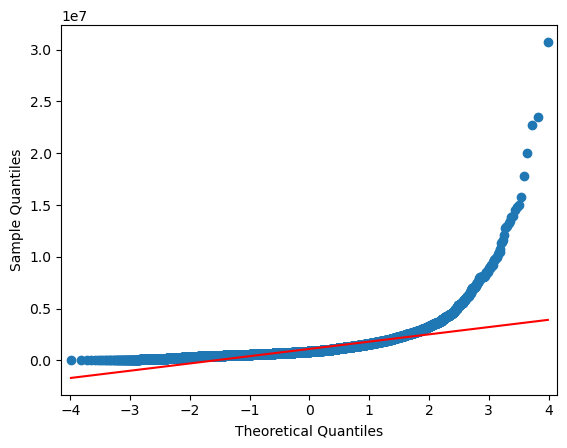

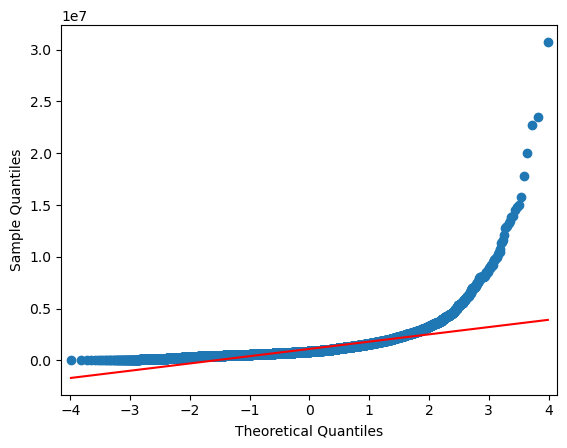

In [142]:
sm.qqplot(data['price'], line='r')

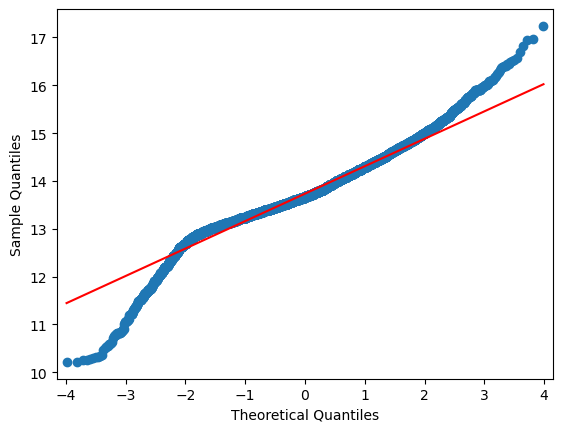

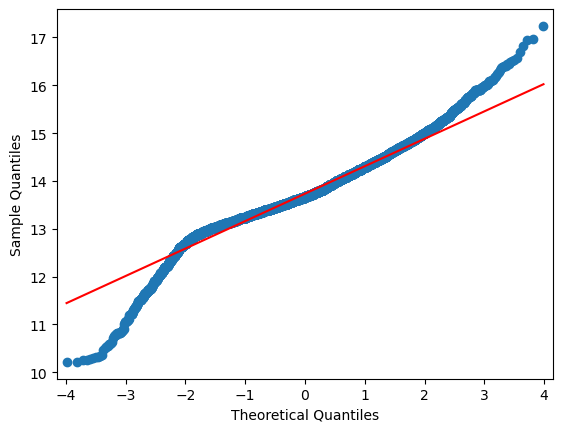

In [143]:
sm.qqplot(np.log(data['price']), line='r')

Addressing the third assumption of linear regression: Normality of residual distribution

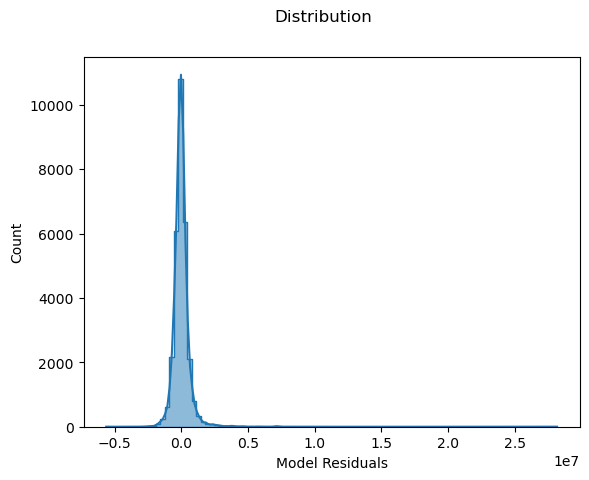

In [144]:
fig, ax = plt.subplots()
sns.histplot(new_subset_results.resid, bins=100, element="step", kde=True, ax=ax)
ax.set_xlabel("Model Residuals"), 
fig.suptitle("Distribution");


In [145]:
residuals = new_subset_results.resid

Checking for normality among the residuals

/tmp/ipykernel_1335/1022723061.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(residuals,kde=True)


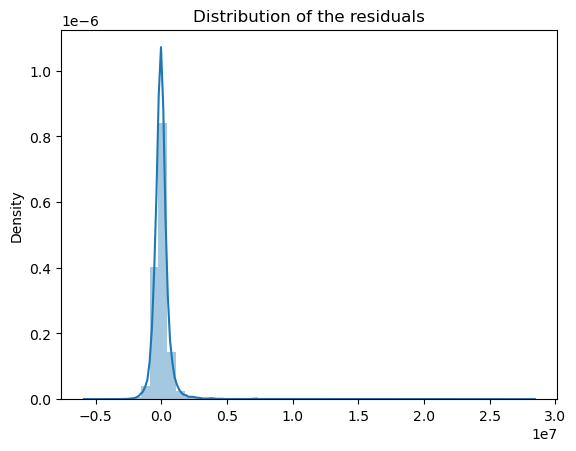

In [146]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Distribution of the residuals')

In [147]:
X_2 = total_subset_data[['bedrooms', 'bedrooms_transformed', 'sqft_living','sqft_total', 'sqft_lot', 'sqft_total_transformed', 'sqft_lot_transformed', 'floors', 'NO', 'YES']]
y_2 = total_subset_data['price']
new_subset_model = sm.OLS(y_2, sm.add_constant(X_2))
new_subset_results = new_subset_model.fit()

new_subset_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     2473.
Date:                Mon, 26 Jun 2023   Prob (F-statistic):               0.00
Time:                        18:16:11   Log-Likelihood:            -4.4776e+05
No. Observations:               30155   AIC:                         8.955e+05
Df Residuals:                   30145   BIC:                         8.956e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   7.617e+05   5.31e+04     14.331      0.000    6.57e+05    8.66e+05
bedrooms                5.532e+04   2.36e+04      2.340      0.019    8984.818    1.02e+05
bedrooms_transformed   -6.216e+05   8.36e+04     -7.433      0.000   -7.86e+05   -4.58e+05
sqft_living              390.5077     20.378     19.163      0.000     350.566     430.450
sqft_total               127.4053      8.744     14.571      0.000     110.267     144.544
sqft_lot                -127.3500      8.743    -14.565      0.000    -144.487    -110.213
sqft_total_transformed  1.869e+09   1.88e+08      9.955      0.000     1.5e+09    2.24e+09
sqft_lot_transformed   -1.219e+08   3.78e+07     -3.223      0.001   -1.96e+08   -4.78e+07
floors                 -6.325e+04   9337.400     -6.774      0.000   -8.16e+04    -4.5e+04
NO                     -2.352e+05   2.93e+04     -8.026      0.000   -2.93e+05   -1.78e+05
YES                     9.968e+05    3.2e+04     31.154      0.000    9.34e+05    1.06e+06
==============================================================================
Omnibus:                    41008.169   Durbin-Watson:                   0.756
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         39763095.284
Skew:                           7.304   Prob(JB):                         0.00
Kurtosis:                     180.295   Cond. No.                     8.63e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.27e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""


A note on variable transformations:

-Rational transformation of square feet variables
+ The coefficient of 'sqft_total_transformed', 1.84 * 10e9, represents the change in the price mean for a one-unit increase in the reciprocal of 'sqft_total', while holding the other variables constant


-Square root transformation of the 'bedrooms' variable:
+ the coefficient of 'bedrooms_transformed' is -6.56 * 10e-05, which means that a one-unit increase in the square root of 'bedrooms' is associated with an estimated average increase of -6.56 * 10e-05 units in price, while controlling for other variables in the model.


In [150]:
y_pred = new_subset_model.fittedvalues()

AttributeError: 'OLS' object has no attribute 'fittedvalues'

In [151]:
new_subset_results.resid.abs()

23470    2.817359e+07
3760     1.958129e+07
25561    1.674969e+07
27175    1.409777e+07
18100    8.928100e+06
             ...     
27028    4.269076e+05
20406    9.503469e+05
7577     7.697673e+05
21793    1.215064e+06
8557     3.377453e+05
Length: 30155, dtype: float64

In [152]:
mae = new_subset_results.resid.abs().sum() / len(y)
mae

385628.64109786594

In [153]:
mae/total_subset_data['price'].mean()

0.3478720560252572

In [154]:
rmse = ((subset_results.resid ** 2).sum() / len(y)) ** 0.5
rmse

677561.8926437015

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


ValueError: num must be 1 <= num <= 5, not 6

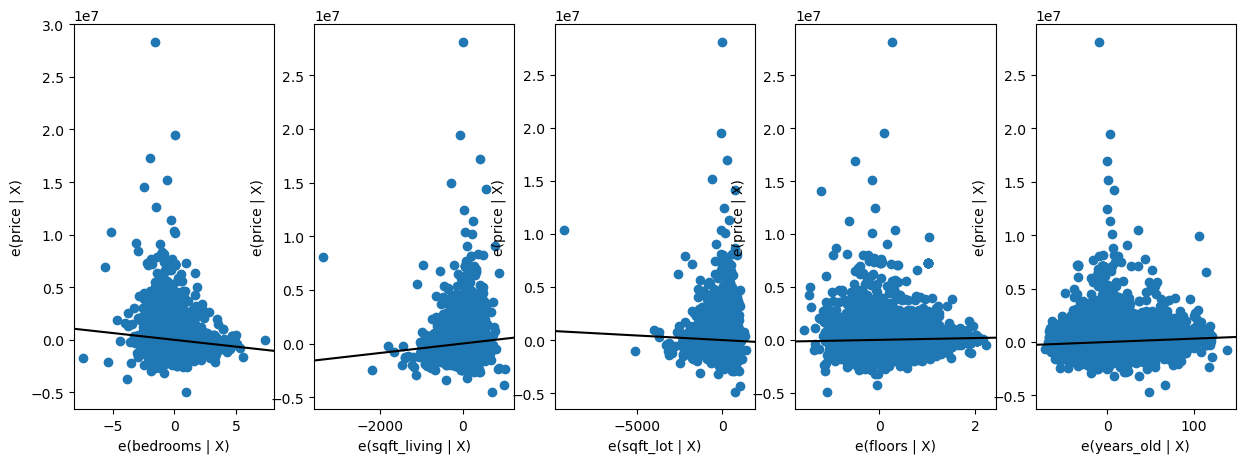

In [155]:
fig = plt.figure(figsize=(15,5))
sm.graphics.plot_partregress_grid(
    subset_results,
    exog_idx=list(X.columns),
    grid=(1,5
),
    fig=fig)
plt.tight_layout()
plt.show()

### 

# **Conclusions/Recommendations**

**1. House with a view, any view:** Merely the presence of any sort of view is correlated with a massive price increase in average sale price compared with homes that have no view. Develop properties with favorable views (be it property  location, window placement, etc.

**2. Square feet of living space is paramount.** Our models showed that square feet of living space is correlated with a higher price per square foot than any other part of the property. So in development, skip the patios, big garage, large basement, etc.

**3. Waterfront properties are a gold mine.** The basic data, confirmed by one of the models produced, show that the average home price that is a ‘waterfront property’ is over $1.5 million more than homes with no waterfront! Prioritizing the development of waterfront properties could bump up sale price significantly.

# **Next Steps**

### What further types of data could we use to provide better business suggestions to our real estate development company?

-Development costs: Of course, it would be great for sale price to develop properties with waterfronts, nice views, and big living spaces, but what are the costs in King County of such properties/modifications? At what point do the costs outweigh the added revenue?

-Data which breaks down average property prices per neighborhood/town
Other independent variables, which may or may not impact price, but would be interesting to take a look at, such as:

+ Exterior paint color/design

+ Presence of home amenities/luxuries (e.g. pool, gym, sports court)

+ Local crime rates

+ Distance from commercial hubs (e.g. Seattle)

+ Property taxes
